#  Ejemplo Inferencia sobre regresión lineal

## Simulaciones

In [1]:
# Librerías utilizadas en los desarrollos
library(abc)
library(EasyABC)
library(ggplot2)

Loading required package: abc.data

Loading required package: nnet

Loading required package: quantreg

Loading required package: SparseM


Attaching package: 'SparseM'


The following object is masked from 'package:base':

    backsolve


Loading required package: MASS

Loading required package: locfit

locfit 1.5-9.7 	 2023-01-02



In [2]:
# Función para calcular y guardar los estadísticos de resumen
calc.stats <- function(data.obs) {
  model <- lm(y ~ x, data = data.obs)
  intercept <- coef(model)[1]
  slope <- coef(model)[2]
  sigma <- summary(model)$sigma
  return(c(intercept, slope, sigma))
}

In [3]:
# Función para simular estadísticos de resumen basados en los parámetros
prior.model <- function(params){
  samples <- rnorm(n, mean=params[1]+params[2]*x, sd=params[3])
  data.sim <- data.frame(x, y=samples)
  return(calc.stats(data.sim))
}

In [4]:
# Definición de los parámetros de interés

n <- 300  # número de observaciones
intercept <- 10 # intercepto real
slope <- 1 # inclinación real
sigma <- 10 # desviación estándar real

# Simulación de los datos observados
set.seed(100)
x <- 1:n
y <- intercept + slope * x + rnorm(300, 0, sigma)
data.obs <- data.frame(x, y)
S.obs <- calc.stats(data.obs)

# Definición de los parámetros de la distribución a priori
prior.params <- list(c("unif",0,20),c("unif",0,5),c("unif",0.1,50))

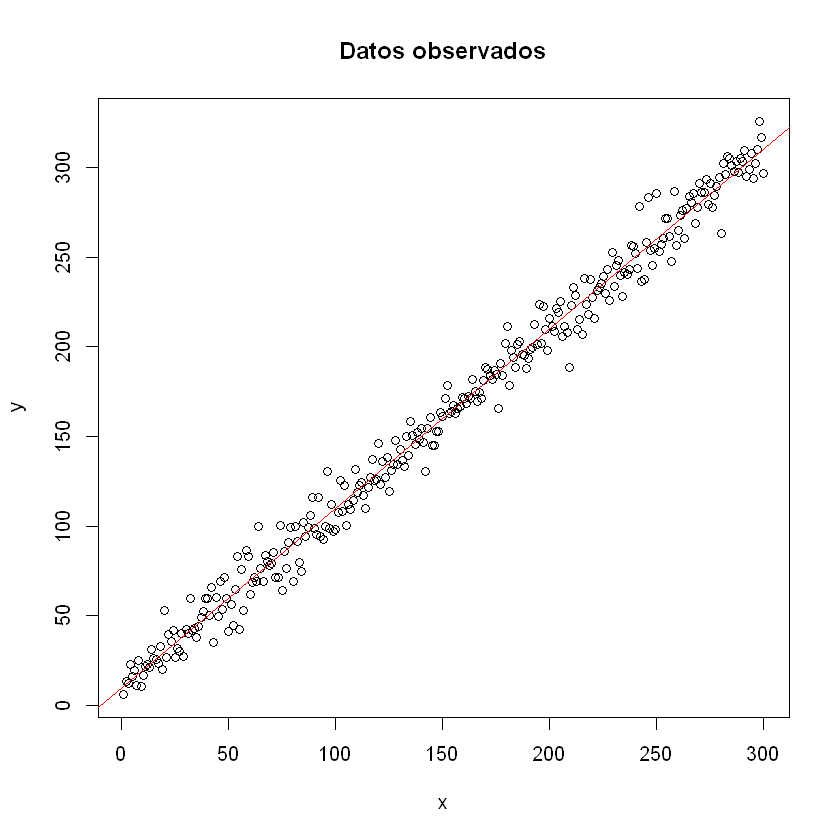

In [5]:
plot(x,y)
abline(lm(y~x), col="red")
title("Datos observados")

In [6]:
# Simulación de parámetros a priori y cálculo de estadísticos de resumen para simulaciones de cada uno
nsim <- 10000;
P.reg <- data.frame(intercept=runif(nsim,0,20), slope=runif(nsim,0,5), sigma=runif(nsim,0.1,50))
S.reg <- t(apply(P.reg, 1, prior.model))
colnames(S.reg) <- c("intercept", "slope", "sigma")

## Rejection Sampler

In [7]:
rejection <- abc(S.obs,P.reg,S.reg,tol=0.1,method="rejection",nproc=4);

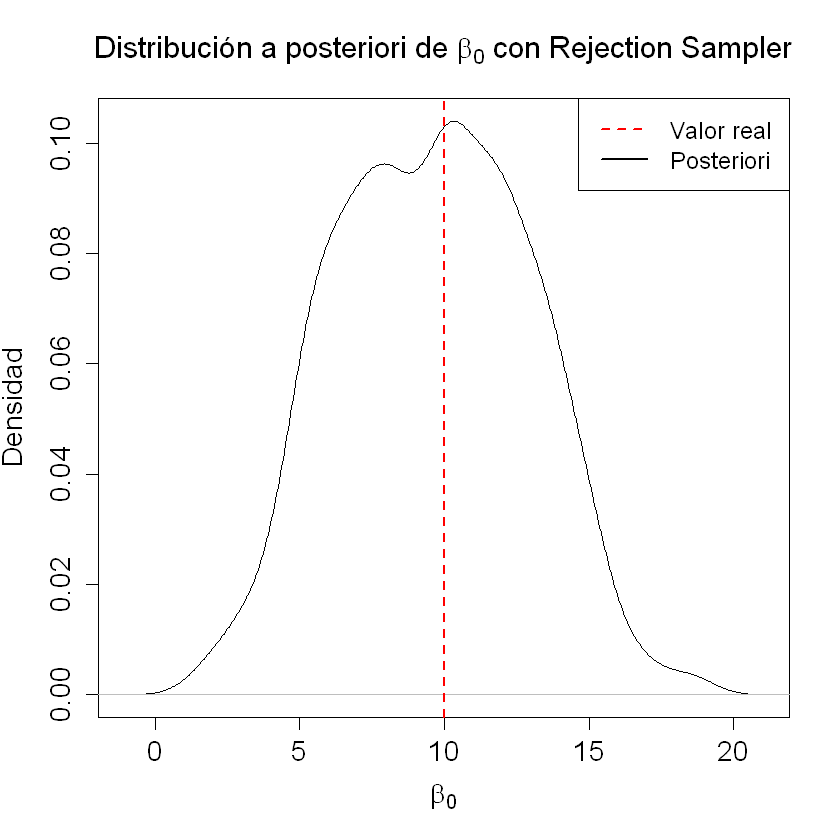

In [12]:
# Gráficos de distribuciones a posteriori basadas en Rejection Sampler

data.plot <- rejection$unadj.values

# Distribición a posteriori de intercepto
plot(density(data.plot[,1]), main=expression(paste("Distribución a posteriori de ", beta[0], " con Rejection Sampler")),xlab=expression(beta[0]), ylab="Densidad", cex.main=1.5,cex.lab=1.4,cex.axis=1.4)
abline(v=10, col="red", lwd=2, lty=2)
legend("topright", legend=c("Valor real", "Posteriori"), col=c("red","black"), lty=c(2,1), lwd=2, cex=1.2)

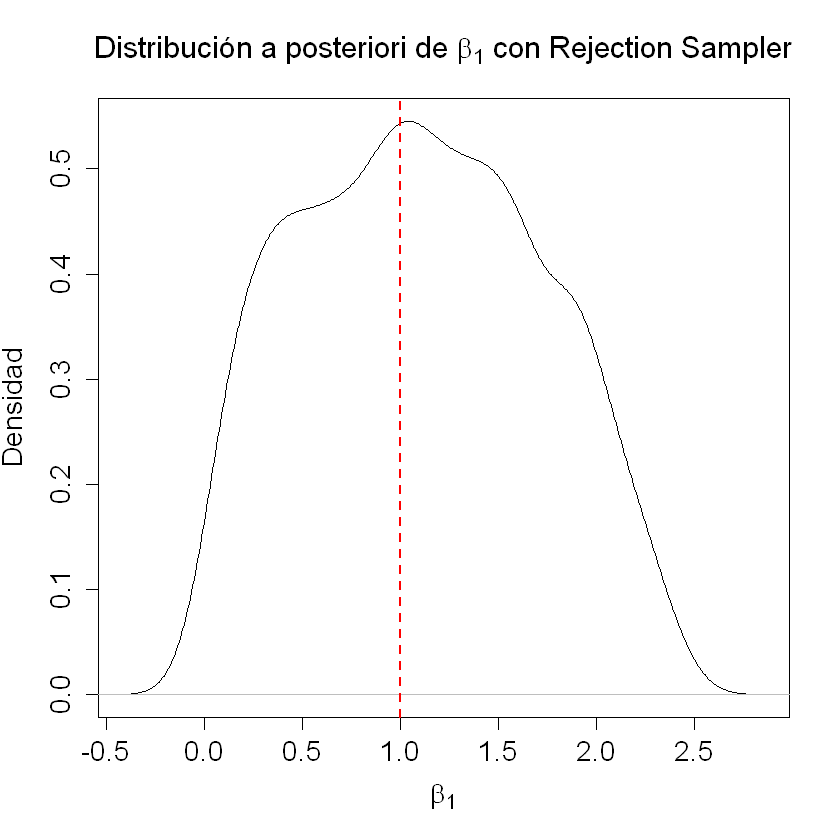

In [13]:
# Distribición a posteriori de inclinación
plot(density(data.plot[,2]), main=expression(paste("Distribución a posteriori de ", beta[1], " con Rejection Sampler")),xlab=expression(beta[1]), ylab="Densidad", cex.main=1.5,cex.lab=1.4,cex.axis=1.4)
abline(v=1, col="red", lwd=2, lty=2)

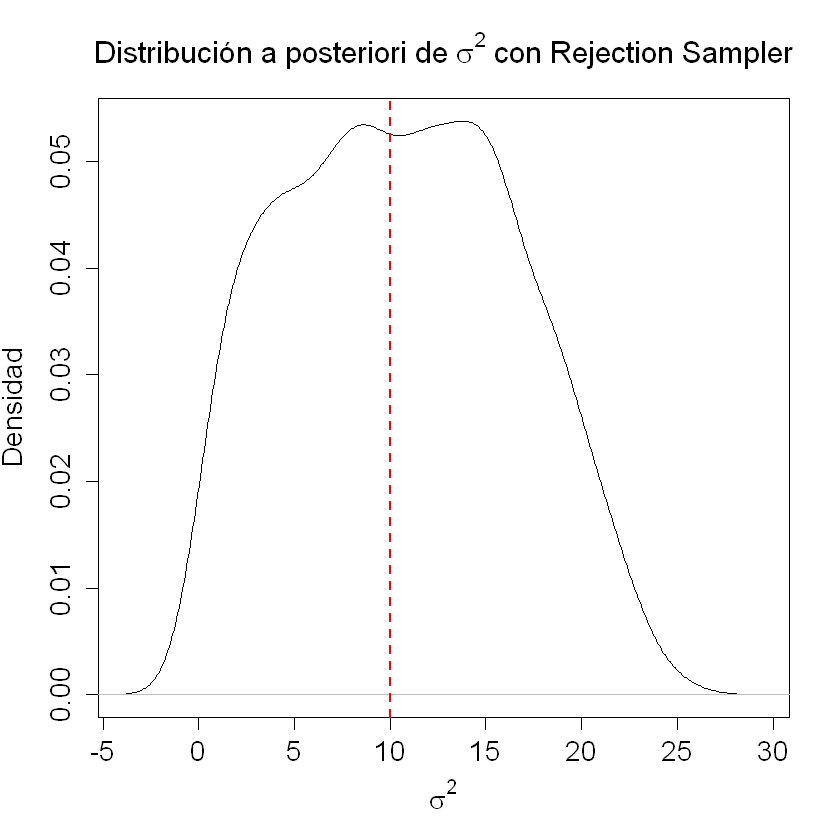

In [15]:
# Distribición a posteriori de sigma
plot(density(data.plot[,3]), main=expression(paste("Distribución a posteriori de ", sigma^2, " con Rejection Sampler")),xlab=expression(sigma^2), ylab="Densidad", cex.main=1.5,cex.lab=1.4,cex.axis=1.4)
abline(v=10, col="red", lwd=2, lty=2)

## Loc Linear Reg

In [16]:
loc.linear <- abc(S.obs,P.reg,S.reg,tol=0.1,method="loclinear",nproc=4);

Warning message:
"All parameters are "none" transformed."


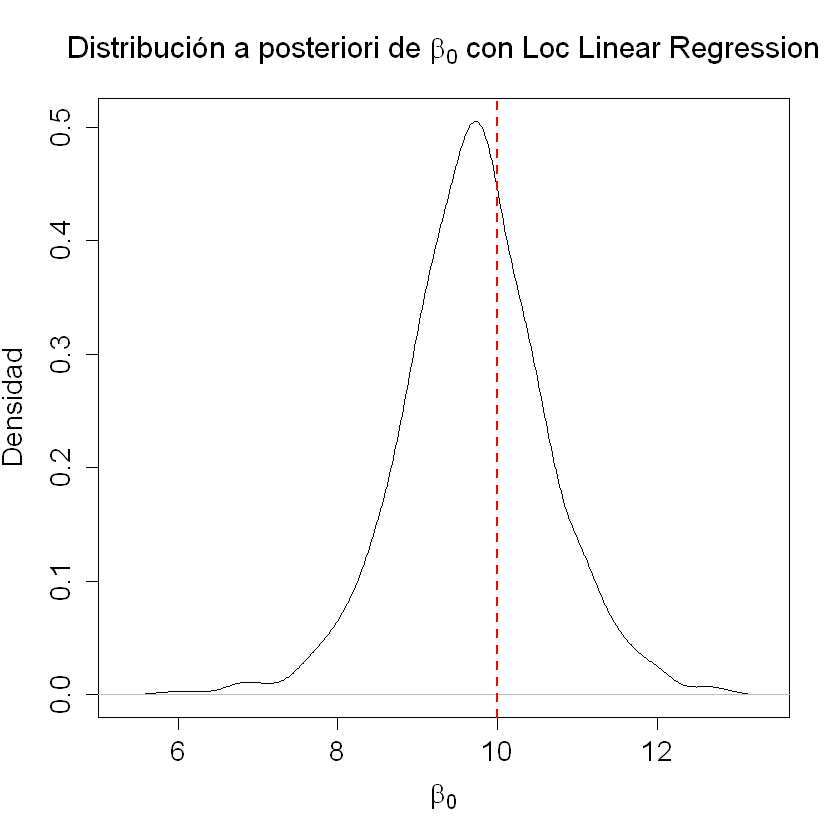

In [17]:
# Gráficos de distribuciones a posteriori basadas en Local Linear Regression
data.plot <- loc.linear$adj.values

# Distribición a posteriori de intercepto
plot(density(data.plot[,1]), main=expression(paste("Distribución a posteriori de ", beta[0], " con Loc Linear Regression")),xlab=expression(beta[0]), ylab="Densidad", cex.main=1.5,cex.lab=1.4,cex.axis=1.4)
abline(v=10, col="red", lwd=2, lty=2)

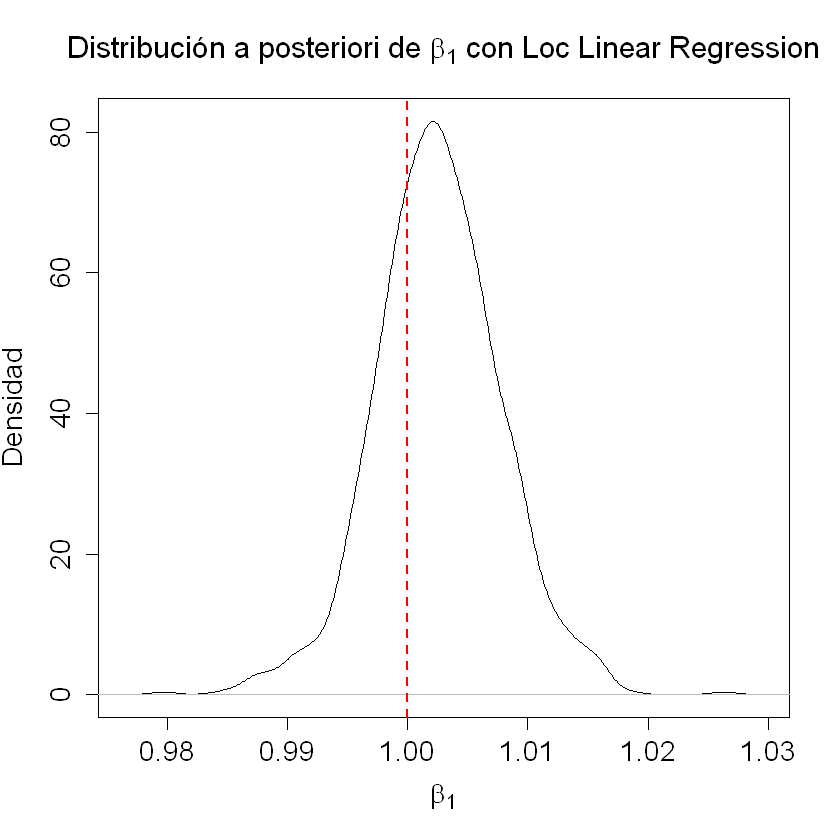

In [18]:
# Distribición a posteriori de inclinación
plot(density(data.plot[,2]), main=expression(paste("Distribución a posteriori de ", beta[1], " con Loc Linear Regression")),xlab=expression(beta[1]), ylab="Densidad", cex.main=1.5,cex.lab=1.4,cex.axis=1.4)
abline(v=1, col="red", lwd=2, lty=2)

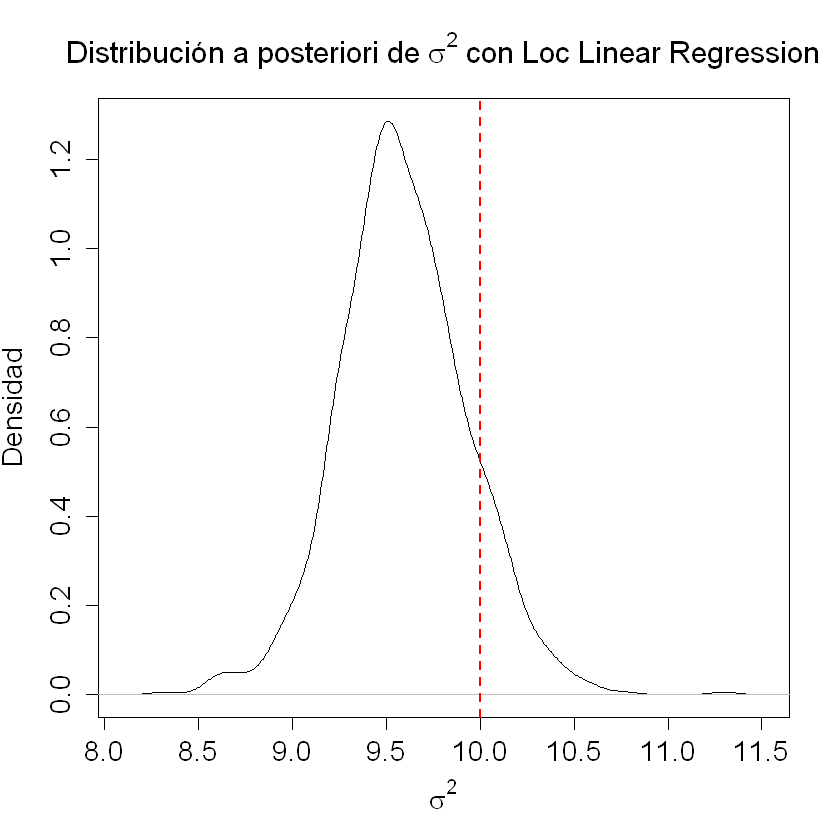

In [20]:
# Distribición a posteriori de sigma
plot(density(data.plot[,3]), main=expression(paste("Distribución a posteriori de ", sigma^2, " con Loc Linear Regression")),xlab=expression(sigma^2), ylab="Densidad", cex.main=1.5,cex.lab=1.4,cex.axis=1.4)
abline(v=10, col="red", lwd=2, lty=2)

## NeuralNet

In [21]:
neural.net <- abc(S.obs,P.reg,S.reg,tol=0.1,method="neuralnet",nproc=4);

Warning message:
"All parameters are "none" transformed."


12345678910
12345678910


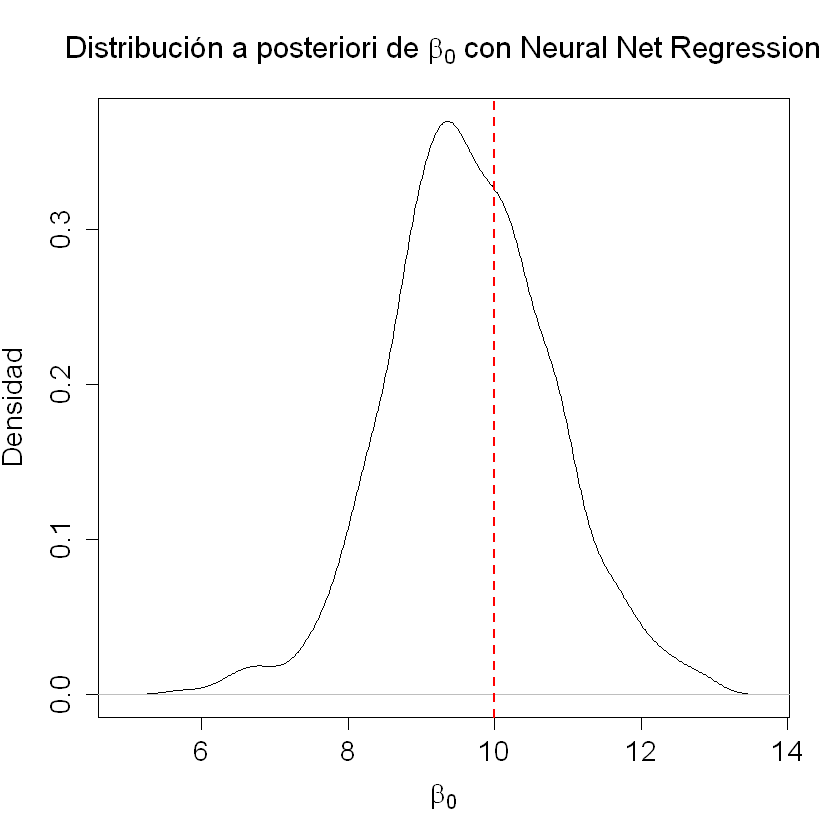

In [22]:
# Gráficos de distribuciones a posteriori basadas en Neural Net Regression
data.plot <- neural.net$adj.values

# Distribición a posteriori de intercepto
plot(density(data.plot[,1]), main=expression(paste("Distribución a posteriori de ", beta[0], " con Neural Net Regression")),xlab=expression(beta[0]), ylab="Densidad", cex.main=1.5,cex.lab=1.4,cex.axis=1.4)
abline(v=10, col="red", lwd=2, lty=2)


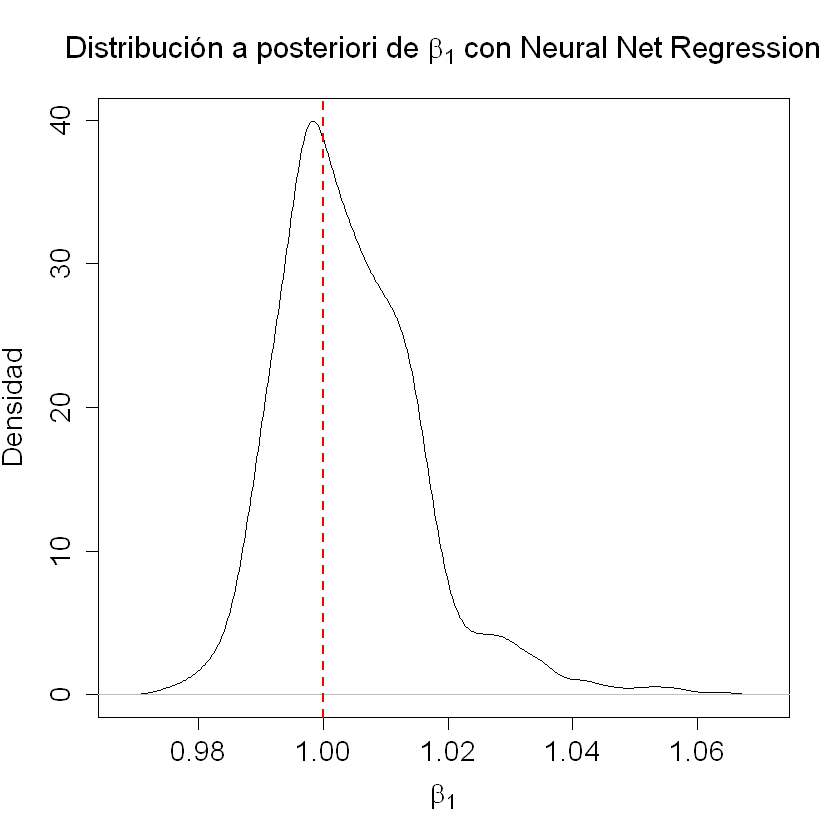

In [23]:
# Distribición a posteriori de inclinación
plot(density(data.plot[,2]), main=expression(paste("Distribución a posteriori de ", beta[1], " con Neural Net Regression")),xlab=expression(beta[1]), ylab="Densidad", cex.main=1.5,cex.lab=1.4,cex.axis=1.4)
abline(v=1, col="red", lwd=2, lty=2)

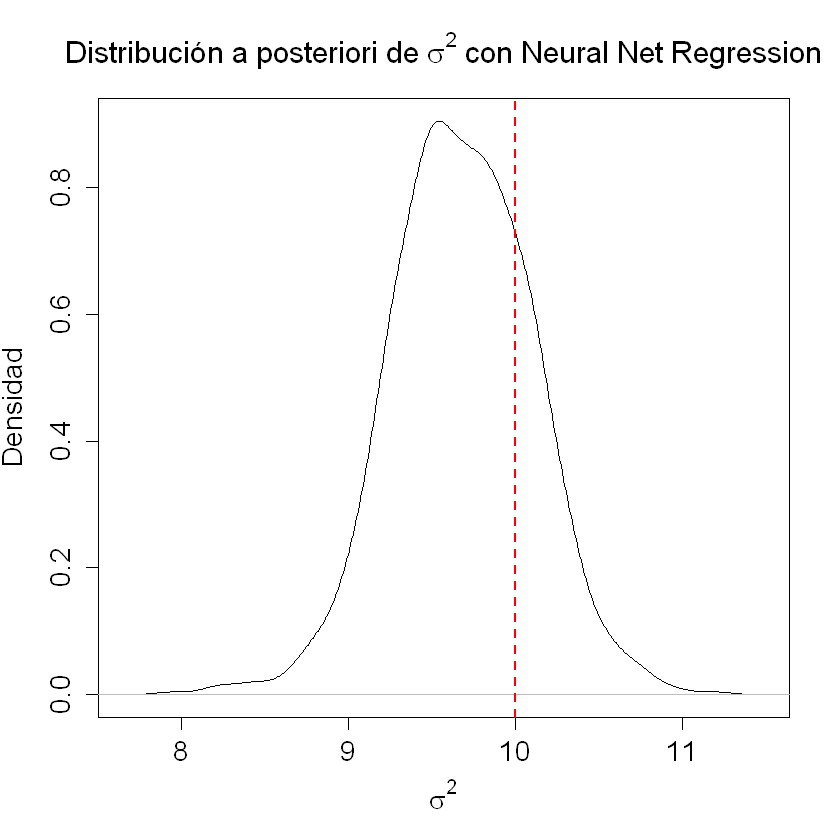

In [24]:
# Distribición a posteriori de sigma
plot(density(data.plot[,3]), main=expression(paste("Distribución a posteriori de ", sigma^2, " con Neural Net Regression")),xlab=expression(sigma^2), ylab="Densidad", cex.main=1.5,cex.lab=1.4,cex.axis=1.4)
abline(v=10, col="red", lwd=2, lty=2)

## MCMC

In [25]:
ABC.mcmc <- ABC_mcmc(method="Marjoram", model=prior.model, prior=prior.params, summary_stat_target=S.obs, n_rec = 0.1*nsim);

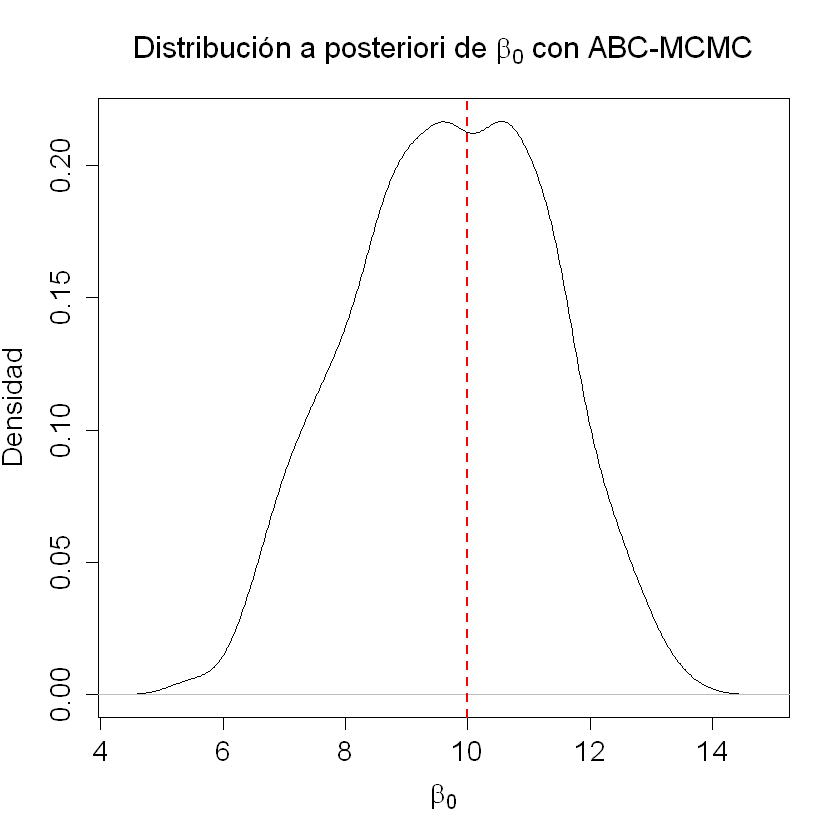

In [26]:
# Graficos de distribuciones a posteriori basadas en ABC-MCMC
data.plot <- ABC.mcmc$param

# Distribición a posteriori de intercepto
plot(density(data.plot[,1]), main=expression(paste("Distribución a posteriori de ", beta[0], " con ABC-MCMC")),xlab=expression(beta[0]), ylab="Densidad", cex.main=1.5,cex.lab=1.4,cex.axis=1.4)
abline(v=10, col="red", lwd=2, lty=2)

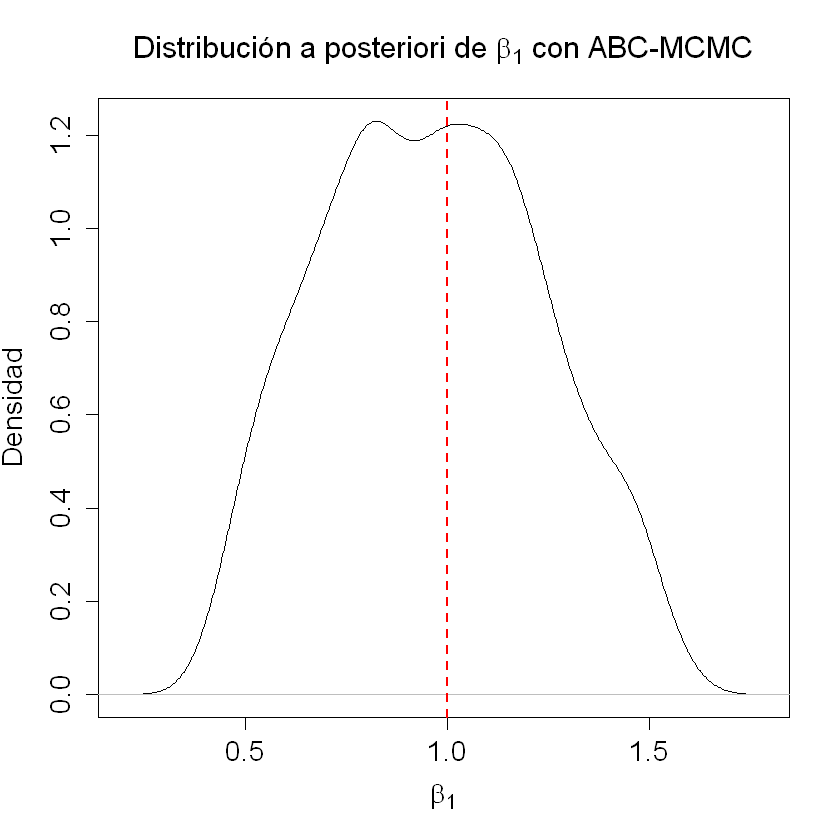

In [27]:
# Distribición a posteriori de inclinación
plot(density(data.plot[,2]), main=expression(paste("Distribución a posteriori de ", beta[1], " con ABC-MCMC")),xlab=expression(beta[1]), ylab="Densidad", cex.main=1.5,cex.lab=1.4,cex.axis=1.4)
abline(v=1, col="red", lwd=2, lty=2)

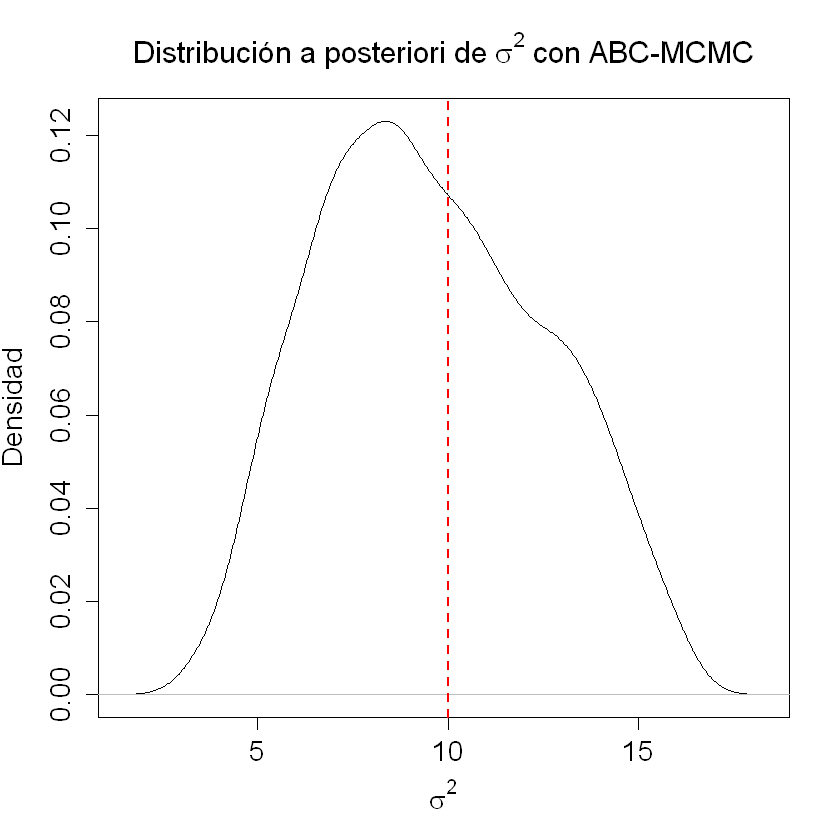

In [28]:
# Distribición a posteriori de sigma
plot(density(data.plot[,3]), main=expression(paste("Distribución a posteriori de ", sigma^2, " con ABC-MCMC")),xlab=expression(sigma^2), ylab="Densidad", cex.main=1.5,cex.lab=1.4,cex.axis=1.4)
abline(v=10, col="red", lwd=2, lty=2)

## Funciones varias

In [ ]:
# Rutina para guardar los gráficos directamente en el directorio de trabajo
pplot <- function(data.plot, namefile, title, xlab, ylab, value){
    png(file=namefile, width=700, height=700, res=100)
    plot(density(data.plot), 
        main=title,
        xlab=xlab, 
        ylab=ylab, 
        cex.main=1.5,
        cex.lab=1.4,
        cex.axis=1.4)
    abline(v=value, col="red", lwd=2, lty=2)
    legend("topright", legend=c("Valor real", "Posteriori"), col=c("red","black"), lty=c(2,1), lwd=2, cex=1.2)
    dev.off()
}



data.plot <- rejection$unadj.values

pplot(data.plot[,1], "C:/Users/carlo/OneDrive - Universidad Técnica Federico Santa María/1) Estudio/MAT 468 Simulación estocástica/Proyecto/imgs/RegresionRS0.png", 
        expression(paste("Distribución a posteriori de ", beta[0], " con Rejection Sampler", sep="")),
        expression(beta[0]),
        "Densidad", 10)
pplot(data.plot[,2], "C:/Users/carlo/OneDrive - Universidad Técnica Federico Santa María/1) Estudio/MAT 468 Simulación estocástica/Proyecto/imgs/RegresionRS1.png", 
        expression(paste("Distribución a posteriori de ", beta[1], " con Rejection Sampler", sep="")),
        expression(beta[1]),
        "Densidad", 1)
pplot(data.plot[,3], "C:/Users/carlo/OneDrive - Universidad Técnica Federico Santa María/1) Estudio/MAT 468 Simulación estocástica/Proyecto/imgs/RegresionRS2.png",
        expression(paste("Distribución a posteriori de ", sigma^2, " con Rejection Sampler", sep="")),
        expression(sigma),
        "Densidad", 10)

data.plot <- loc.linear$adj.values

pplot(data.plot[,1], "C:/Users/carlo/OneDrive - Universidad Técnica Federico Santa María/1) Estudio/MAT 468 Simulación estocástica/Proyecto/imgs/RegresionLL0.png", 
        expression(paste("Distribución a posteriori de ", beta[0], " con Loc Linear Regression", sep="")),
        expression(beta[0]),
        "Densidad", 10)
pplot(data.plot[,2], "C:/Users/carlo/OneDrive - Universidad Técnica Federico Santa María/1) Estudio/MAT 468 Simulación estocástica/Proyecto/imgs/RegresionLL1.png",
        expression(paste("Distribución a posteriori de ", beta[1], " con Loc Linear Regression", sep="")),
        expression(beta[1]),
        "Densidad", 1)
pplot(data.plot[,3], "C:/Users/carlo/OneDrive - Universidad Técnica Federico Santa María/1) Estudio/MAT 468 Simulación estocástica/Proyecto/imgs/RegresionLL2.png",
        expression(paste("Distribución a posteriori de ", sigma^2, " con Loc Linear Regression", sep="")),
        expression(sigma),
        "Densidad", 10)

data.plot <- neural.net$adj.values

pplot(data.plot[,1], "C:/Users/carlo/OneDrive - Universidad Técnica Federico Santa María/1) Estudio/MAT 468 Simulación estocástica/Proyecto/imgs/RegresionNN0.png", 
        expression(paste("Distribución a posteriori de ", beta[0], " con Neural Net Regression", sep="")),
        expression(beta[0]),
        "Densidad", 10)
pplot(data.plot[,2], "C:/Users/carlo/OneDrive - Universidad Técnica Federico Santa María/1) Estudio/MAT 468 Simulación estocástica/Proyecto/imgs/RegresionNN1.png",
        expression(paste("Distribución a posteriori de ", beta[1], " con Neural Net Regression", sep="")),
        expression(beta[1]),
        "Densidad", 1)
pplot(data.plot[,3], "C:/Users/carlo/OneDrive - Universidad Técnica Federico Santa María/1) Estudio/MAT 468 Simulación estocástica/Proyecto/imgs/RegresionNN2.png",
        expression(paste("Distribución a posteriori de ", sigma^2, " con Neural Net Regression", sep="")),
        expression(sigma),
        "Densidad", 10)

data.plot <- ABC.mcmc$param

pplot(data.plot[,1], "C:/Users/carlo/OneDrive - Universidad Técnica Federico Santa María/1) Estudio/MAT 468 Simulación estocástica/Proyecto/imgs/RegresionMCMC0.png", 
        expression(paste("Distribución a posteriori de ", beta[0], " con ABC-MCMC", sep="")),
        expression(beta[0]),
        "Densidad", 10)
pplot(data.plot[,2], "C:/Users/carlo/OneDrive - Universidad Técnica Federico Santa María/1) Estudio/MAT 468 Simulación estocástica/Proyecto/imgs/RegresionMCMC1.png",
        expression(paste("Distribución a posteriori de ", beta[1], " con ABC-MCMC", sep="")),
        expression(beta[1]),
        "Densidad", 1)
pplot(data.plot[,3], "C:/Users/carlo/OneDrive - Universidad Técnica Federico Santa María/1) Estudio/MAT 468 Simulación estocástica/Proyecto/imgs/RegresionMCMC2.png",
        expression(paste("Distribución a posteriori de ", sigma^2, " con ABC-MCMC", sep="")),
        expression(sigma),
        "Densidad", 10)

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2